# Requirements

In [ ]:
!pip install tensorflow keras

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [ ]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("BTC-Daily.csv")
df

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...
2646,12/2/2014 0:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,12/1/2014 0:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,11/30/2014 0:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,11/29/2014 0:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [4]:
df["date"] = pd.to_datetime(df["date"])
df.set_index(keys=["date"], inplace=True)
df.sort_index(inplace=True)
df

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2014-11-28,BTC/USD,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
...,...,...,...,...,...,...,...
2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07


In [5]:
df.symbol.unique()

array(['BTC/USD'], dtype=object)

In [6]:
df.drop(columns=['symbol'], inplace=True)
df

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
...,...,...,...,...,...,...
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07


Explore the dataset using visualizations of your choice.

<Axes: >

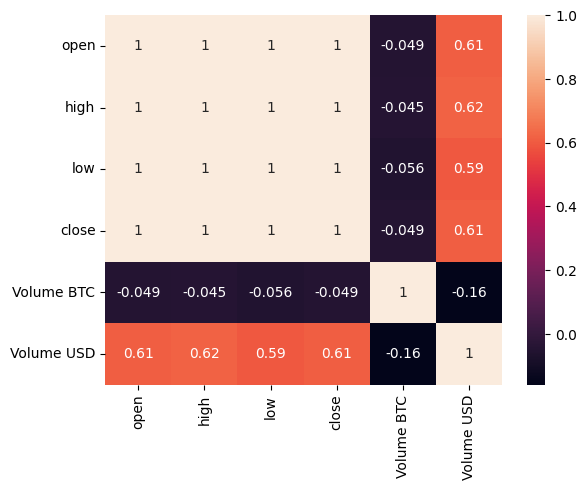

In [7]:
# Write your code here. Add as many boxes as you need.
sns.heatmap(df.corr(), annot=True)

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [8]:
# Write your code here. Add as many boxes as you need.
df = df[["close"]].copy()

In [9]:
lag = 7

In [10]:
periods = range(lag, 0, -1)

In [11]:
df.shift(periods=periods)

,close_7,close_6,close_5,close_4,close_3,close_2,close_1
date,,,,,,,
2014-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-29,NaN,NaN,NaN,NaN,NaN,NaN,376.28
2014-11-30,NaN,NaN,NaN,NaN,NaN,376.28,376.72
2014-12-01,NaN,NaN,NaN,NaN,376.28,376.72,373.34
2014-12-02,NaN,NaN,NaN,376.28,376.72,373.34,378.39
...,...,...,...,...,...,...,...
2022-02-25,39996.99,40109.02,38373.90,37076.60,38269.94,37274.18,38376.88
2022-02-26,40109.02,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64
2022-02-27,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64,39146.66


In [12]:
df = pd.concat([df, df.shift(periods=periods)], axis=1)

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.head()

,close,close_7,close_6,close_5,close_4,close_3,close_2,close_1
date,,,,,,,,
2014-12-05,374.95,376.28,376.72,373.34,378.39,379.25,376.67,365.20
2014-12-06,375.07,376.72,373.34,378.39,379.25,376.67,365.20,374.95
2014-12-07,376.87,373.34,378.39,379.25,376.67,365.20,374.95,375.07
2014-12-08,364.61,378.39,379.25,376.67,365.20,374.95,375.07,376.87
2014-12-09,350.49,379.25,376.67,365.20,374.95,375.07,376.87,364.61


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [15]:
# Write your code here. Add as many boxes as you need.
X, y = df.drop(columns=["close"]), df["close"]

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [20]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [21]:
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(2115, 7, 1)

In [22]:
train_X = train_X.reshape(train_X.shape[0], lag, (train_X.shape[1] // lag))
test_X = test_X.reshape(test_X.shape[0], lag, (test_X.shape[1] // lag))

## Neural Networks

Create an LSTM model and train it using the `train` function.

In [31]:
# Write your code here. Add as many boxes as you need.
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 7, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

Use the trained model to make predictions for the test set.

In [34]:
# Write your code here. Add as many boxes as you need.
history = model.fit(train_X, train_y, validation_split=0.2, epochs=16, batch_size=16, shuffle=False)

Epoch 1/16
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 2/16
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 3/16
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/16
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/16
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/16
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 7/16
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_lo

<Axes: >

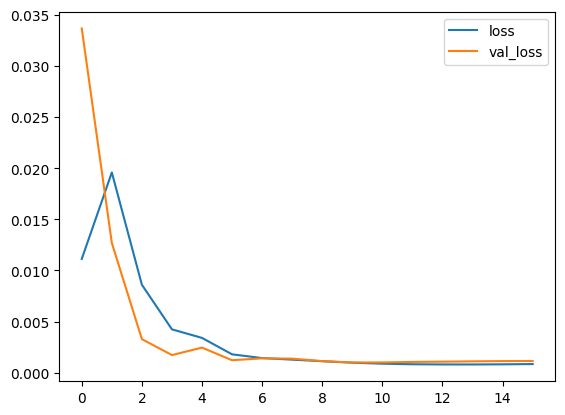

In [35]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [36]:
pred_y = model.predict(test_X)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [37]:
pred_y = scaler.inverse_transform(pred_y)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [38]:
# Write your code here. Add as many boxes as you need.
r2_score(test_y, pred_y)

0.9344584848145774

# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

Create an LSTM model to predict the 'close' price on a montly frequency.

In [40]:
df = df.groupby(pd.Grouper(freq="1m")).mean()
df

C:\Users\spase\AppData\Local\Temp\ipykernel_7268\2909579976.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.groupby(pd.Grouper(freq="1m")).mean()


,close,close_7,close_6,close_5,close_4,close_3,close_2,close_1
date,,,,,,,,
2014-12-31,336.915185,351.622222,349.515185,347.817407,345.689630,343.402222,341.014444,338.617037
2015-01-31,247.703871,264.531290,262.392581,260.412581,258.706129,256.111613,253.530000,250.970645
2015-02-28,234.278214,234.673929,234.087857,232.995714,232.163571,232.227857,232.297500,233.028214
2015-03-31,268.596774,267.455806,267.810645,268.150645,268.421613,268.883226,269.060323,268.887097
2015-04-30,234.833333,239.573667,239.019667,238.247000,237.293667,236.417000,235.847667,235.107667
...,...,...,...,...,...,...,...,...
2021-11-30,60705.494000,61744.982000,61547.769667,61503.167000,61347.282000,61153.345333,60987.910667,60851.671333
2021-12-31,49328.349032,51184.920645,50967.409677,50702.928065,50603.855806,50370.586129,50020.418710,49675.437742
2022-01-31,41111.849677,43562.009032,43127.611935,42677.228387,42241.430000,41925.464194,41658.021935,41360.960968


In [41]:
X, y = df.drop(columns=["close"]), df["close"]

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

In [43]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [44]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [45]:
train_X = train_X.reshape(train_X.shape[0], lag, (train_X.shape[1] // lag))
test_X = test_X.reshape(test_X.shape[0], lag, (test_X.shape[1] // lag))

In [85]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu", return_sequences=True),
    LSTM(16, activation="relu"),
    Dense(1, activation="linear")
])

In [86]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [87]:
history = model.fit(train_X, train_y, validation_split=0.2, epochs=12, batch_size=16, shuffle=False)

Epoch 1/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 589ms/step - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.3542 - val_mean_squared_error: 0.3542
Epoch 2/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.3334 - val_mean_squared_error: 0.3334
Epoch 3/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.3113 - val_mean_squared_error: 0.3113
Epoch 4/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.2876 - val_mean_squared_error: 0.2876
Epoch 5/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.2612 - val_mean_squared_error: 0.2612
Epoch 6/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 7/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1987 - val_mean_squar

<Axes: >

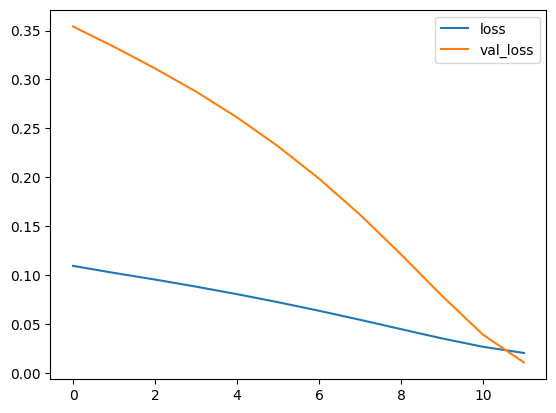

In [88]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [89]:
pred_y = model.predict(test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [90]:
pred_y = scaler.inverse_transform(pred_y)

In [91]:
r2_score(test_y, pred_y)

-122.84744932227731